In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
new_df = pd.read_csv("new_df.csv")

In [3]:
new_df.head()

,Brand,Capacity,Automation_Type,Load_Type,Current_Price,Original_Price,Ratings,Discount,number_rating,number_reviews
0,Whirlpool,7.0,Fully Automatic,Top Load,14490.0,19550.0,4.1,25.0,46397.0,2890.0
1,Godrej,7.0,Fully Automatic,Top Load,13990.0,27300.0,4.2,48.0,9824.0,678.0
2,realme,7.0,Semi Automatic,Top Load,7890.0,12490.0,4.2,36.0,94783.0,8182.0
3,realme,7.5,Semi Automatic,Top Load,8290.0,13990.0,4.2,40.0,94783.0,8182.0
4,MarQ,7.0,Semi Automatic,Top Load,7390.0,13990.0,4.3,47.0,62042.0,6102.0


# Types of Columns :

### Categorical Columns -

Brand

Automation_Type

Load_Type

### Numerical Columns - 

Capacity

Current Price

Original Price

Ratings

Discount

number_rating

number_reviews

# UNI-VARIATE ANALYSIS

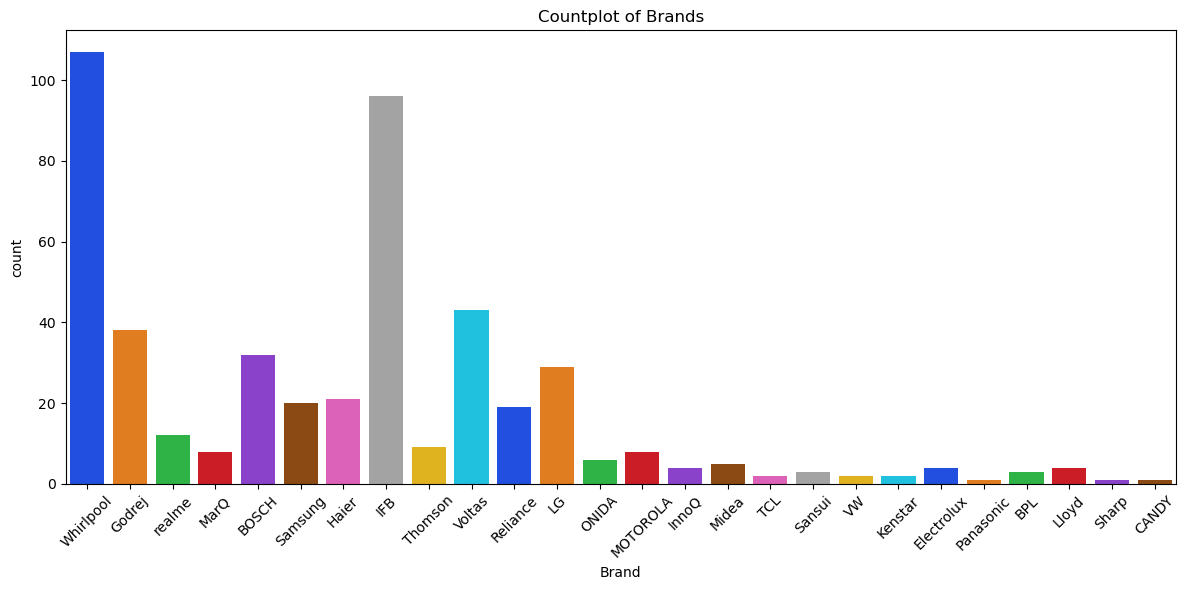

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(data=new_df, x="Brand",palette="bright")
plt.title("Countplot of Brands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

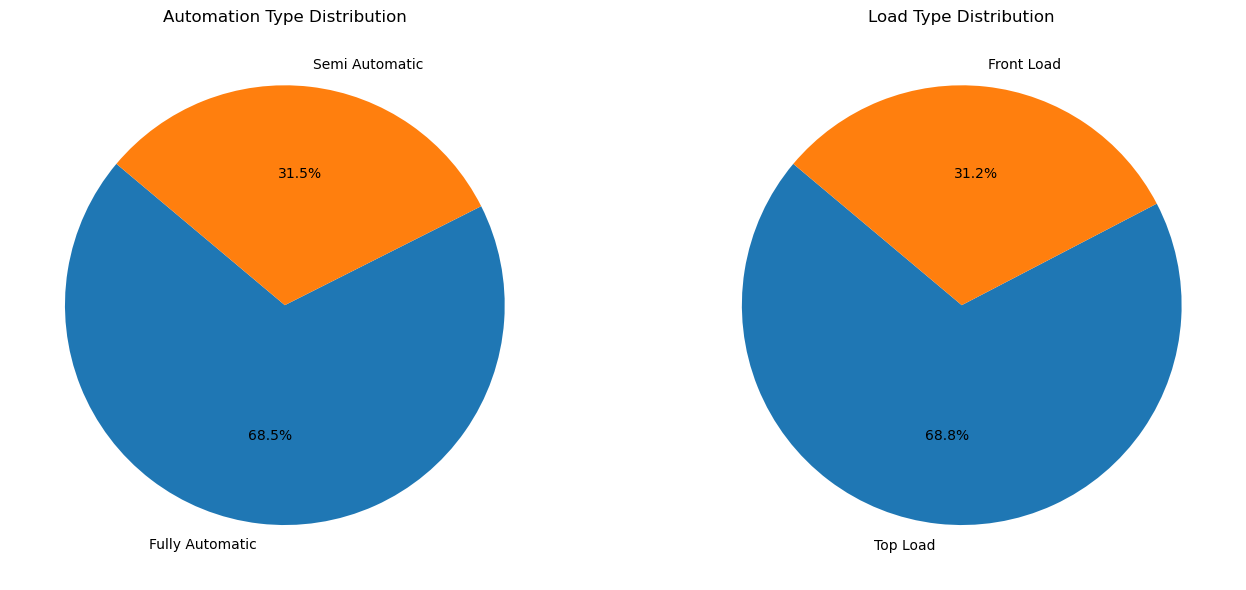

In [66]:
auto_counts = new_df["Automation_Type"].value_counts()
load_counts = new_df["Load_Type"].value_counts()

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.pie(auto_counts,labels=auto_counts.index,autopct='%1.1f%%',startangle=140)
plt.title("Automation Type Distribution")

plt.subplot(1, 2, 2)
plt.pie(load_counts,labels=load_counts.index,autopct='%1.1f%%',startangle=140)
plt.title("Load Type Distribution")

plt.tight_layout()
plt.show()


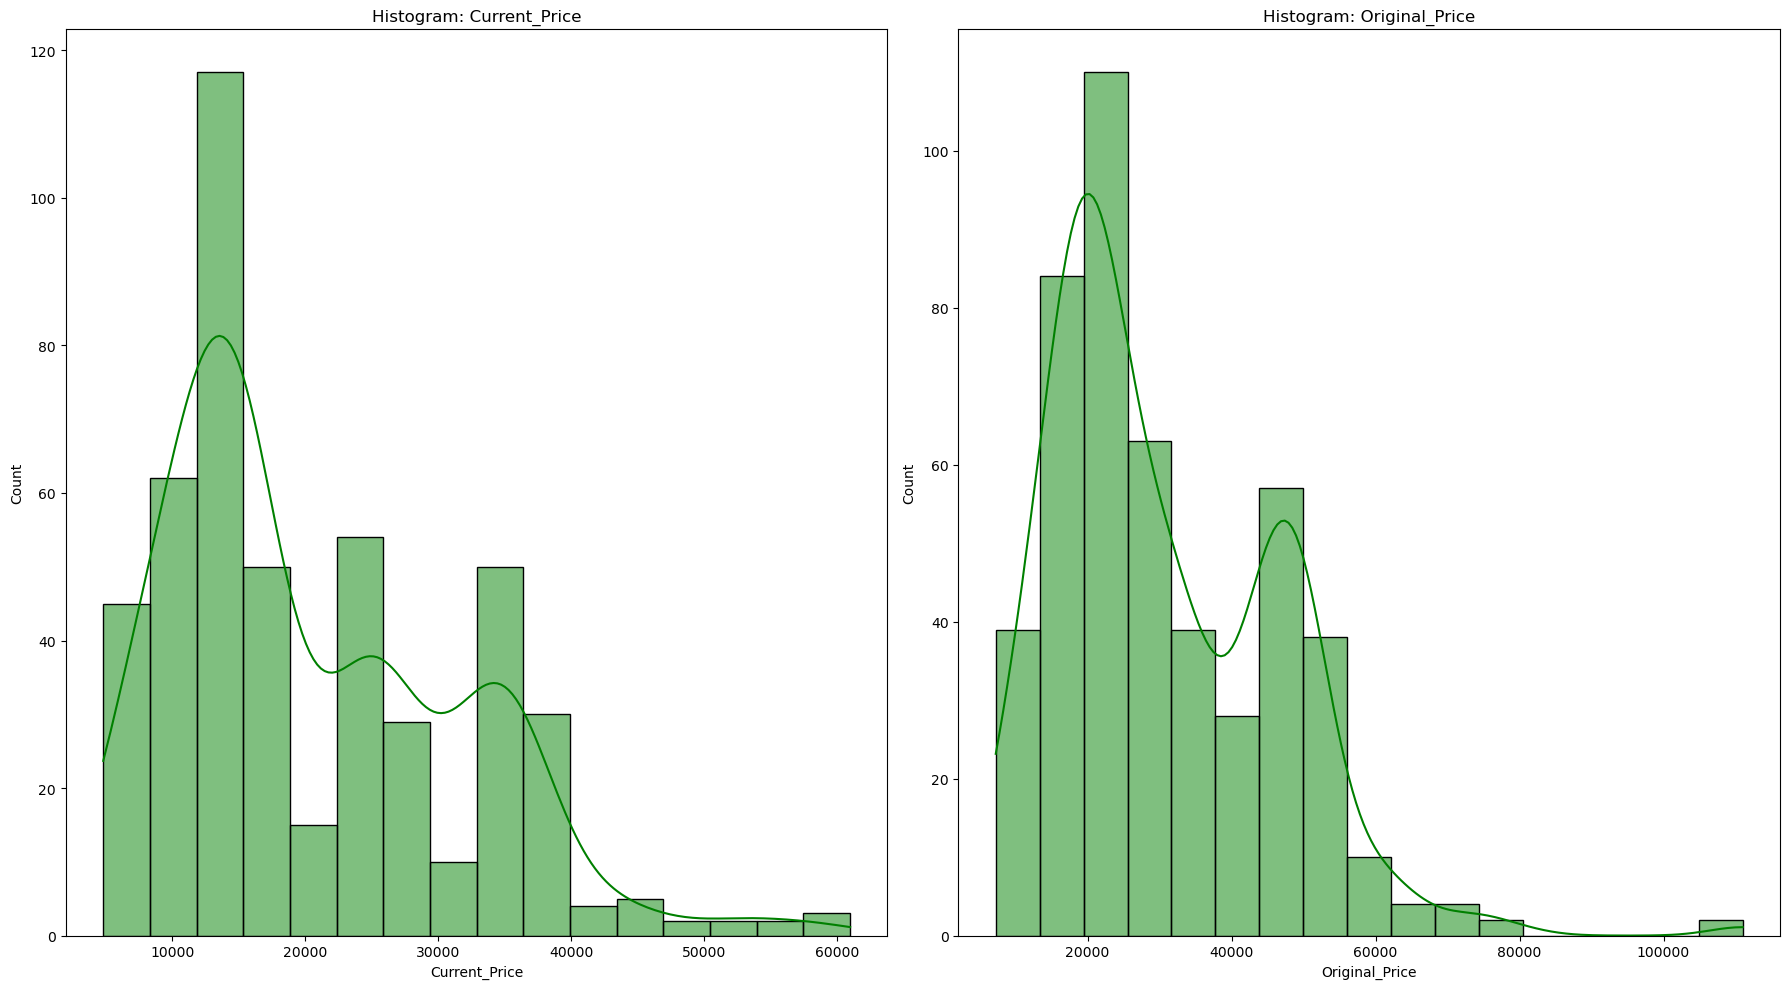

In [67]:

required_cols = ["Current_Price", "Original_Price"] 

plt.figure(figsize=(18, 10))
for i, col in enumerate(required_cols, 1):
    plt.subplot(1, len(required_cols), i)
    sns.histplot(new_df[col], kde=True,color='g')
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()



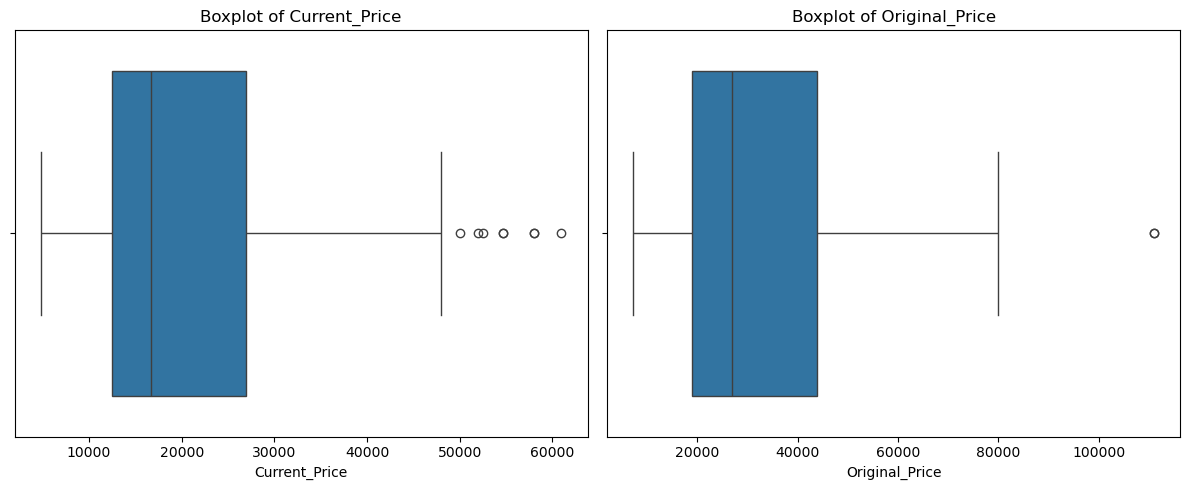

In [68]:
cols = ["Current_Price", "Original_Price"]

plt.figure(figsize=(12,5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=new_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


# BI-VARIATE ANALYSIS

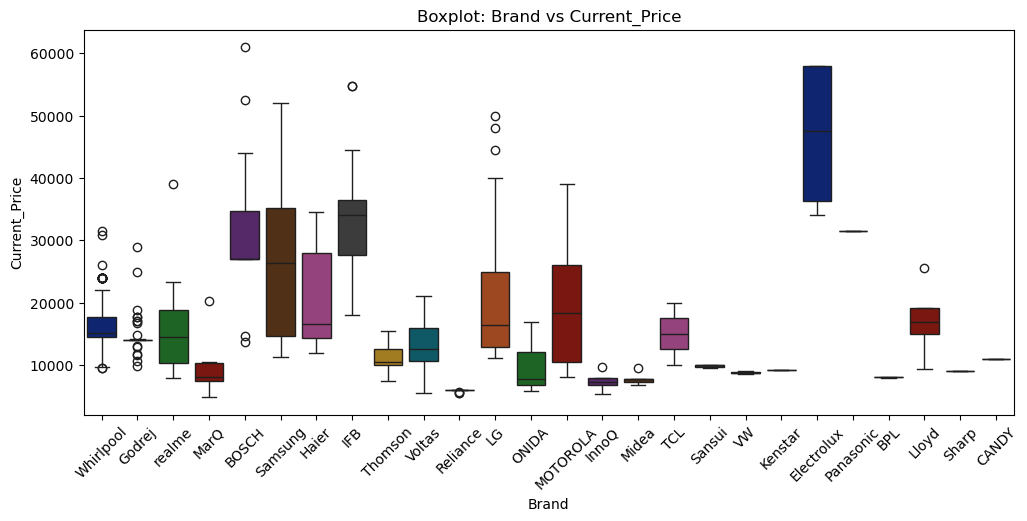

In [72]:
cat_col = "Brand"
num_col = "Current_Price"

plt.figure(figsize=(12,5))

sns.boxplot(data=new_df,x=cat_col,y=num_col,palette="dark")
plt.xticks(rotation=45)
plt.title(f"Boxplot: {cat_col} vs {num_col}")
plt.show()


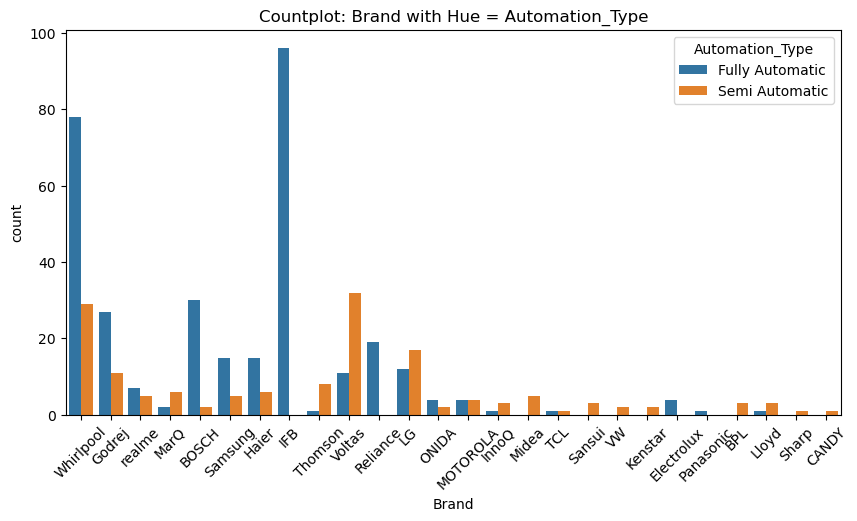

In [74]:
cat_col = "Brand"
hue_col = "Automation_Type"

plt.figure(figsize=(10,5))
sns.countplot(data=new_df, x=cat_col, hue=hue_col)
plt.xticks(rotation=45)
plt.title(f"Countplot: {cat_col} with Hue = {hue_col}")
plt.show()


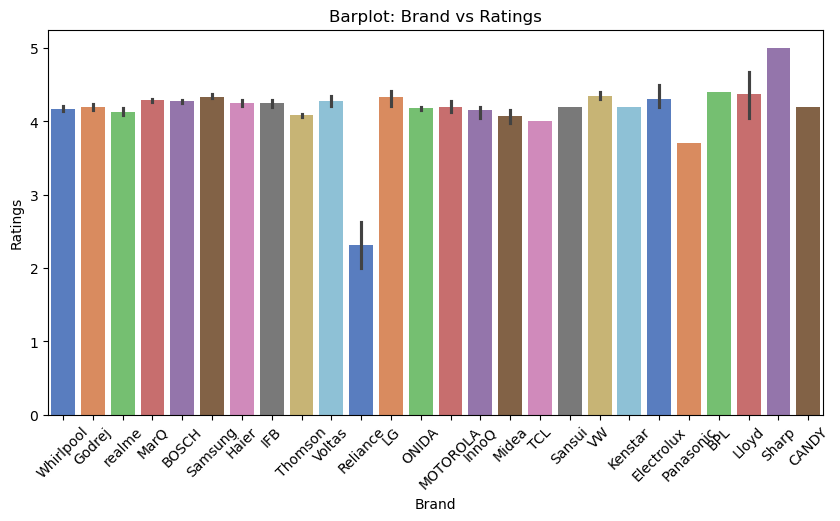

In [75]:
cat_col = "Brand"
num_col = "Ratings"

plt.figure(figsize=(10,5))
sns.barplot(data=new_df, x=cat_col, y=num_col,palette='muted')
plt.xticks(rotation=45)
plt.title(f"Barplot: {cat_col} vs {num_col}")
plt.show()


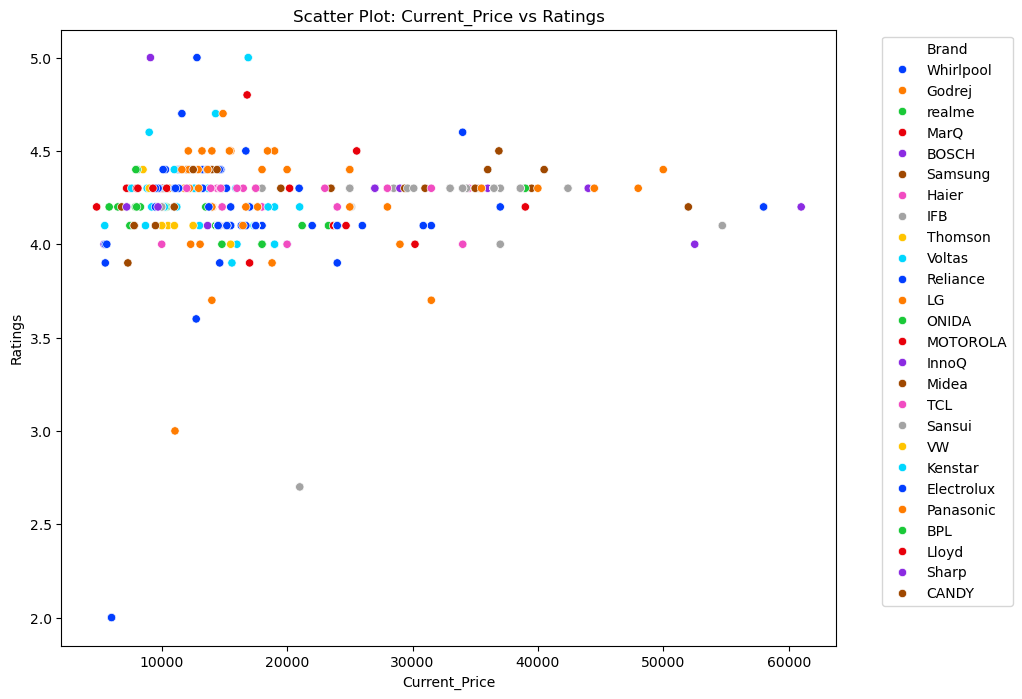

In [79]:
x_col = "Current_Price"
y_col = "Ratings"

plt.figure(figsize=(10,8))
sns.scatterplot(data=new_df,x=x_col,y=y_col,hue="Brand",palette="bright")
plt.title(f"Scatter Plot: {x_col} vs {y_col}")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# MULTI-VARIATE ANALYSIS

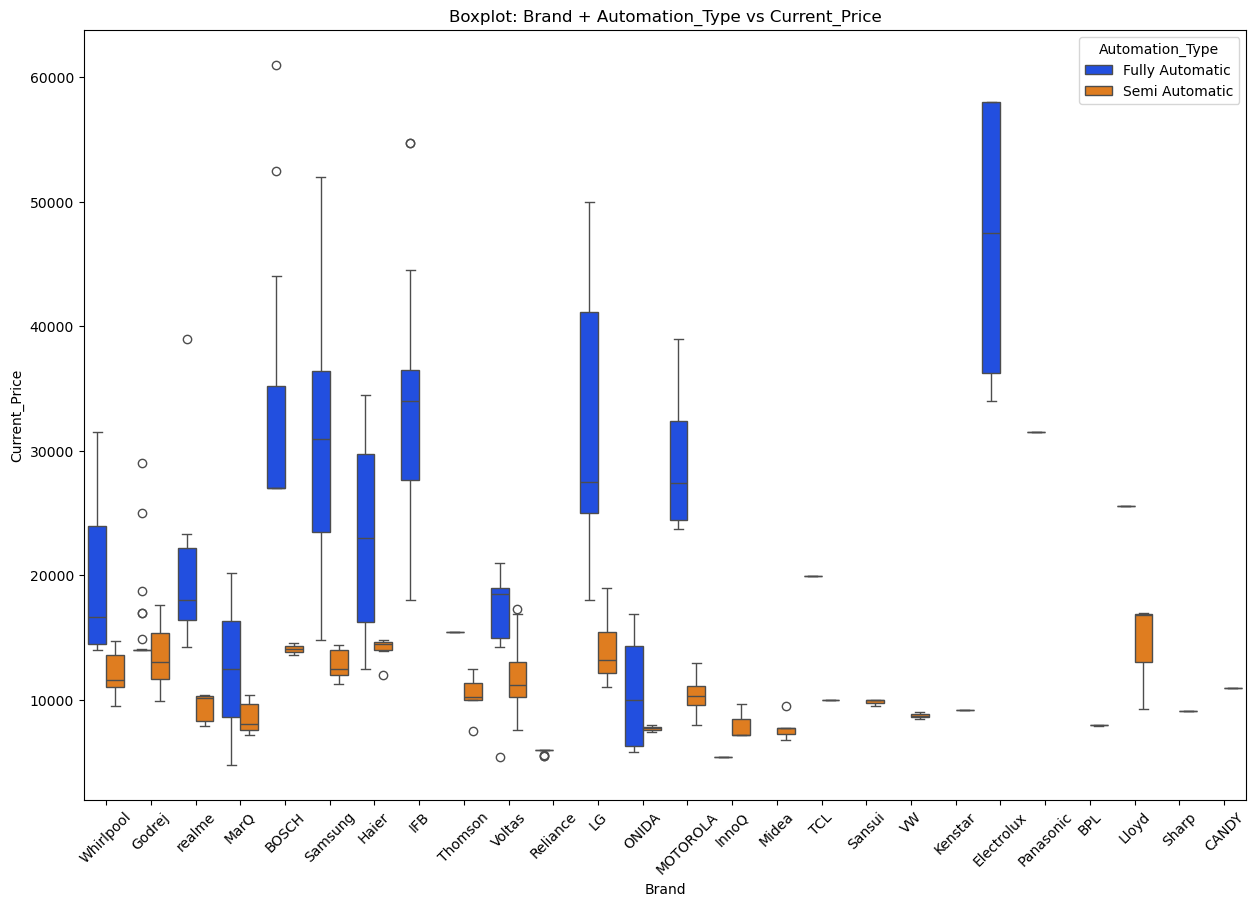

In [88]:
cat_col1 = "Brand"
cat_col2 = "Automation_Type"
num_col  = "Current_Price"

plt.figure(figsize=(15,10))
sns.boxplot(data=new_df, x=cat_col1, y=num_col, hue=cat_col2, palette="bright")
plt.xticks(rotation=45)
plt.title(f"Boxplot: {cat_col1} + {cat_col2} vs {num_col}")
plt.legend(title=cat_col2)
plt.show()


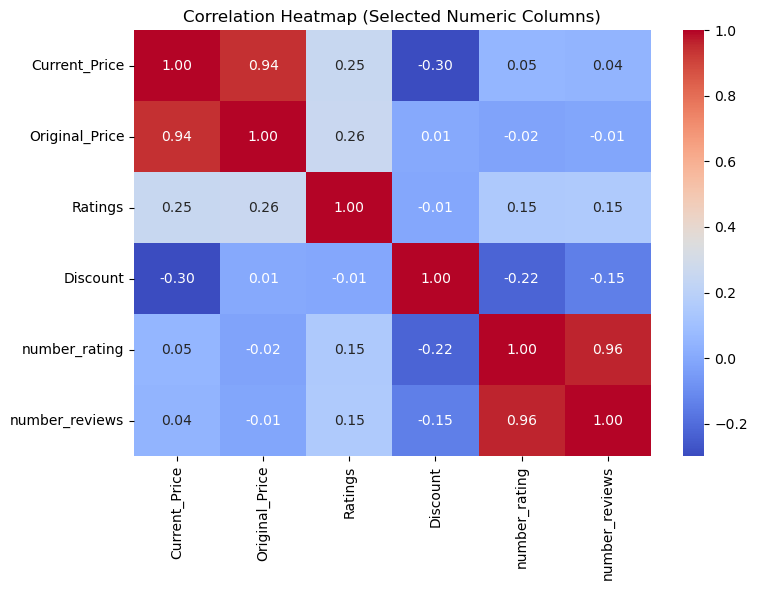

In [95]:
num_cols = ["Current_Price", "Original_Price", "Ratings", "Discount", "number_rating", "number_reviews"]
corr = new_df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Selected Numeric Columns)")
plt.tight_layout()
plt.show()
